In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashiongen-validation/fashiongen_256_256_train.h5
/kaggle/input/fashiongen-validation/fashiongen_256_256_validation.h5


In [106]:
import h5py
filename='/kaggle/input/fashiongen-validation/fashiongen_256_256_train.h5'

In [107]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [108]:
dataset = h5py.File(filename, "r")

# Show keys
print(*[item for item in dataset.items()],sep="\n")

('index', <HDF5 dataset "index": shape (260490, 1), type "<i8">)
('index_2', <HDF5 dataset "index_2": shape (260490,), type "<i8">)
('input_brand', <HDF5 dataset "input_brand": shape (260490, 1), type "|S100">)
('input_category', <HDF5 dataset "input_category": shape (260490, 1), type "|S100">)
('input_composition', <HDF5 dataset "input_composition": shape (260490, 1), type "|S200">)
('input_concat_description', <HDF5 dataset "input_concat_description": shape (260490, 1), type "|S800">)
('input_department', <HDF5 dataset "input_department": shape (260490, 1), type "|S100">)
('input_description', <HDF5 dataset "input_description": shape (260490, 1), type "|S400">)
('input_gender', <HDF5 dataset "input_gender": shape (260490, 1), type "|S30">)
('input_image', <HDF5 dataset "input_image": shape (260490, 256, 256, 3), type "|u1">)
('input_msrpUSD', <HDF5 dataset "input_msrpUSD": shape (260490, 1), type "<f4">)
('input_name', <HDF5 dataset "input_name": shape (260490, 1), type "|S100">)
('i

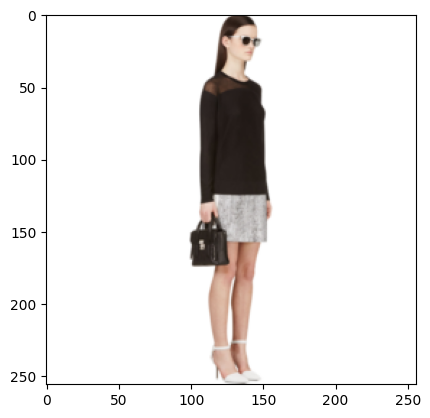

In [109]:
plt.imshow(dataset['input_image'][10001])

In [172]:
categories=[]
composition=[]
description=[]
gender=[]
image=[]
pose=[]
sub_categories=[]

In [173]:
for i in range(100001,130001):
    if(dataset['input_pose'][i][0] not in [b'id_gridfs_4',b'id_gridfs_5',b'id_gridfs_6']):
        if(i%10000==0):
            print(i)
        categories.append(dataset['input_category'][i][0])
        description.append(dataset['input_description'][i][0])
        gender.append(dataset['input_gender'][i][0])
        image.append(dataset['input_image'][i])
        pose.append(dataset['input_pose'][i][0])
        sub_categories.append(dataset['input_subcategory'][i][0])

110000
120000


In [174]:
categories=pd.Series(categories)
description=pd.Series(description)
gender=pd.Series(gender)
pose=pd.Series(pose)
sub_categories=pd.Series(sub_categories)

In [175]:
categories

0                  b'HEELS'
1                  b'HEELS'
2                  b'JEANS'
3                  b'JEANS'
4                  b'JEANS'
                ...        
20431    b'JACKETS & COATS'
20432    b'JACKETS & COATS'
20433        b'ESPADRILLES'
20434        b'ESPADRILLES'
20435        b'ESPADRILLES'
Length: 20436, dtype: object

In [176]:
df=pd.DataFrame()

In [177]:
df['category']=categories
df['description']=description
df['gender']=gender
df['pose']=pose
df['sub_category']=sub_categories

In [178]:
df[df['pose']==b'id_gridfs_1']

,category,description,gender,pose,sub_category
2,b'JEANS',b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'id_gridfs_1',b'JEANS'
5,b'SNEAKERS',b'Metallic faux-leather platform loafers in si...,b'Women',b'id_gridfs_1',b'LOW TOP SNEAKERS'
8,b'JEANS',b'Slim-fit jeans in \'bleach\' light blue. Mid...,b'Men',b'id_gridfs_1',b'JEANS'
11,b'HEELS',b'Grained leather heels in black. Pointed toe....,b'Women',b'id_gridfs_1',b'HEELS'
14,b'TOPS',b'Short sleeve cotton jersey t-shirt in black....,b'Men',b'id_gridfs_1',b'T-SHIRTS'
...,...,...,...,...,...
20421,b'JACKETS & COATS',b'Long sleeve quilted down jacket in grey. Rib...,b'Women',b'id_gridfs_1',b'DOWN'
20424,b'TOPS',b'Short sleeve viscose and wool-blend t-shirt ...,b'Men',b'id_gridfs_1',b'T-SHIRTS'
20427,b'JACKETS & COATS',"b""Long sleeve cotton canvas coat in navy. Stri...",b'Men',b'id_gridfs_1',b'COATS'
20430,b'JACKETS & COATS',"b""Long sleeve grained deerskin jacket featurin...",b'Men',b'id_gridfs_1',b'LEATHER JACKETS'


In [179]:
df['category'].value_counts()

category
b'SWEATERS'                      4302
b'JACKETS & COATS'               3165
b'TOPS'                          2937
b'PANTS'                         2106
b'JEANS'                          936
b'SNEAKERS'                       915
b'SHIRTS'                         753
b'DRESSES'                        564
b'SHOULDER BAGS'                  561
b'BOOTS'                          546
b'HATS'                           489
b'SKIRTS'                         444
b'FLATS'                          282
b'EYEWEAR'                        213
b'SCARVES'                        207
b'BACKPACKS'                      195
b'DUFFLE & TOP HANDLE BAGS'       195
b'TOTE BAGS'                      192
b'SHORTS'                         186
b'SUITS & BLAZERS'                177
b'JEWELRY'                        154
b'HEELS'                          137
b'CLUTCHES & POUCHES'             129
b'KEYCHAINS'                       96
b'MESSENGER BAGS & SATCHELS'       75
b'LACE UPS'                        72
b'S

In [180]:
df[df['category']==b'ESPADRILLES']

,category,description,gender,pose,sub_category
5864,b'ESPADRILLES',b'Suede espadrilles in black. Round toe. Buffe...,b'Men',b'id_gridfs_1',b'ESPADRILLES'
5865,b'ESPADRILLES',b'Suede espadrilles in black. Round toe. Buffe...,b'Men',b'id_gridfs_2',b'ESPADRILLES'
5866,b'ESPADRILLES',b'Suede espadrilles in black. Round toe. Buffe...,b'Men',b'id_gridfs_3',b'ESPADRILLES'
20433,b'ESPADRILLES',b'Coated canvas espadrilles in white. Round to...,b'Men',b'id_gridfs_1',b'ESPADRILLES'
20434,b'ESPADRILLES',b'Coated canvas espadrilles in white. Round to...,b'Men',b'id_gridfs_2',b'ESPADRILLES'
20435,b'ESPADRILLES',b'Coated canvas espadrilles in white. Round to...,b'Men',b'id_gridfs_3',b'ESPADRILLES'


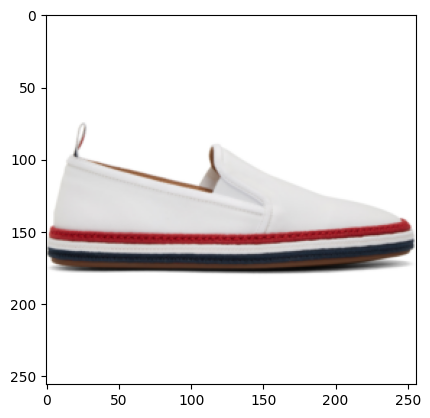

In [182]:
plt.imshow(image[20433])

In [183]:
df=df[~df['category'].isin([b'HATS',b'JUMPSUITS',b'LINGERIE',b'SWIMWEAR',b'TIES',b'BELTS & SUSPENDERS',b'FINE JEWELRY',b'SCARVES',b'CLUTCHES & POUCHES',b'GLOVES',b'SNEAKERS',b'BOOTS',b'FLATS',b'SHOULDER BAGS',b'HEELS',b'BACKPACKS',b'TOTE BAGS',b'MESSENGER BAGS & SATCHELS',b'LOAFERS',b'SANDALS',b'JEWELRY',b'LACE UPS',b'DUFFLE & TOP HANDLE BAGS',b'POUCHES & DOCUMENT HOLDERS',b'EYEWEAR',b'KEYCHAINS',b'ESPADRILLES',b'DUFFLE BAGS',b'BLANKETS',b'SOCKS',b'MONKSTRAPS',b'BOAT SHOES & MOCCASINS',b'BAG ACCESSORIES',b'POCKET SQUARES & TIE BARS',b'BAG ACCESSORIES',b'DUFFLE & TOP HANDLE BAGS',b'BRIEFCASES',b'TRAVEL BAGS',b'ESPADRILLES',])]

In [184]:
df

,category,description,gender,pose,sub_category
2,b'JEANS',b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'id_gridfs_1',b'JEANS'
3,b'JEANS',b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'id_gridfs_2',b'JEANS'
4,b'JEANS',b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'id_gridfs_3',b'JEANS'
8,b'JEANS',b'Slim-fit jeans in \'bleach\' light blue. Mid...,b'Men',b'id_gridfs_1',b'JEANS'
9,b'JEANS',b'Slim-fit jeans in \'bleach\' light blue. Mid...,b'Men',b'id_gridfs_2',b'JEANS'
...,...,...,...,...,...
20428,b'JACKETS & COATS',"b""Long sleeve cotton canvas coat in navy. Stri...",b'Men',b'id_gridfs_2',b'COATS'
20429,b'JACKETS & COATS',"b""Long sleeve cotton canvas coat in navy. Stri...",b'Men',b'id_gridfs_3',b'COATS'
20430,b'JACKETS & COATS',"b""Long sleeve grained deerskin jacket featurin...",b'Men',b'id_gridfs_1',b'LEATHER JACKETS'
20431,b'JACKETS & COATS',"b""Long sleeve grained deerskin jacket featurin...",b'Men',b'id_gridfs_2',b'LEATHER JACKETS'


In [185]:
finalImg=[image[i] for i in df.index]

In [186]:
df.reset_index(drop=True,inplace=True)

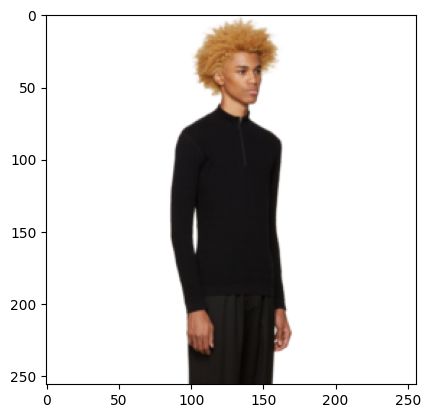

In [187]:
plt.imshow(finalImg[3523])

In [188]:
df['description'][3523]

b'Long sleeve textured stretch-knit pullover in black. Zip closure at mock neck collar. Rib knit sleeve cuffs and hem. Tonal stitching.'

In [189]:
df['pose'] = df['pose'].apply(lambda x: b'front pose' if x == b'id_gridfs_1' else (b'back pose' if x == b'id_gridfs_2' else b'side pose'))

In [190]:
df['final_description']=df['pose']+b' of '+ df['sub_category']+ b' for '+df['gender']+b'. '+df['description']

In [191]:
df['final_description']

0        b'front pose of JEANS for Women. Skinny-fit st...
1        b'back pose of JEANS for Women. Skinny-fit str...
2        b'side pose of JEANS for Women. Skinny-fit str...
3        b'front pose of JEANS for Men. Slim-fit jeans ...
4        b'back pose of JEANS for Men. Slim-fit jeans i...
                               ...                        
15577    b"back pose of COATS for Men. Long sleeve cott...
15578    b"side pose of COATS for Men. Long sleeve cott...
15579    b"front pose of LEATHER JACKETS for Men. Long ...
15580    b"back pose of LEATHER JACKETS for Men. Long s...
15581    b"side pose of LEATHER JACKETS for Men. Long s...
Name: final_description, Length: 15582, dtype: object

In [192]:
# for i in range(df.shape[0]):
#     print(i)
#     if(i not in [109,110,111]):
#         df['final_description'][i].decode('utf-8')
df['final_description']=df['final_description'].apply(lambda x:x.decode('utf-8',errors='replace').replace('\ufffd','').lower())

In [193]:
df['final_description'][0]

'front pose of jeans for women. skinny-fit stretch denim jeans in \'true\' blue. high-rise. four-pocket styling. faux-leather logo patch in black at back waistband. signature stitch accent in white at back pocket. zip-fly. contrast stitching in tan. approx. 5" leg opening.'

In [194]:
df['category']=df['category'].apply(lambda x:x.decode('utf-8',errors='replace').replace('\ufffd','').lower())

In [195]:
df

,category,description,gender,pose,sub_category,final_description
0,jeans,b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'front pose',b'JEANS',front pose of jeans for women. skinny-fit stre...
1,jeans,b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'back pose',b'JEANS',back pose of jeans for women. skinny-fit stret...
2,jeans,b'Skinny-fit stretch denim jeans in \'true\' b...,b'Women',b'side pose',b'JEANS',side pose of jeans for women. skinny-fit stret...
3,jeans,b'Slim-fit jeans in \'bleach\' light blue. Mid...,b'Men',b'front pose',b'JEANS',front pose of jeans for men. slim-fit jeans in...
4,jeans,b'Slim-fit jeans in \'bleach\' light blue. Mid...,b'Men',b'back pose',b'JEANS',back pose of jeans for men. slim-fit jeans in ...
...,...,...,...,...,...,...
15577,jackets & coats,"b""Long sleeve cotton canvas coat in navy. Stri...",b'Men',b'back pose',b'COATS',back pose of coats for men. long sleeve cotton...
15578,jackets & coats,"b""Long sleeve cotton canvas coat in navy. Stri...",b'Men',b'side pose',b'COATS',side pose of coats for men. long sleeve cotton...
15579,jackets & coats,"b""Long sleeve grained deerskin jacket featurin...",b'Men',b'front pose',b'LEATHER JACKETS',front pose of leather jackets for men. long sl...
15580,jackets & coats,"b""Long sleeve grained deerskin jacket featurin...",b'Men',b'back pose',b'LEATHER JACKETS',back pose of leather jackets for men. long sle...


In [196]:
from PIL import Image

In [197]:
count=68513
for i in range(df.shape[0]):
    text_directory = f'/kaggle/working/train/text/{df["category"][i]}'
    image_directory = f'/kaggle/working/train/image/{df["category"][i]}'
    
    os.makedirs(text_directory, exist_ok=True)
    os.makedirs(image_directory, exist_ok=True)
    
    with open(f'{text_directory}/text{count}.txt', 'w') as file:
        file.write(df['final_description'][i])
    img=Image.fromarray(finalImg[i])
    img.save(f'{image_directory}/image{count}.jpg')
    count+=1
print(count)

84095


In [198]:
from IPython.display import FileLink

In [ ]:
!zip -r file.zip /kaggle/working

In [ ]:
!ls

In [171]:
FileLink(r'file.zip')

/kaggle/working/file.zip

In [140]:
import gc

del categories
del description
del gender
del pose
del sub_categories
del df
del image
del finalImg

gc.collect()

537